# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering_data">Gathering data</a></li>
<li><a href="#Assessing_data">Assessing data</a></li>
<li><a href="#Cleaning_data">Cleaning data</a></li>
<li><a href="#Storing_analyzing_visualizing">Storing, analyzing, visualizing</a></li>
<li><a href="#Reporting">Reporting</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Context and Data of the Project 

The project is based on the WeRateDogs Twitter archive of Twitters WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The project will wrangle and analyze this dataset. 

### Required Steps in Project

**Disclaimer:** The following point are from the Udacity project description


The project includes the following steps:
1. Data wrangling, which consists of:
    - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data
    - Cleaning data
3. Storing, analyzing, and visualizing your wrangled data
5. Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [5]:
# import all relevant packages that are required in the project 
import pandas as pd
import numpy as np

# used for data dowload in data gathering step 
import requests

# for vizualisation
import matplotlib.pyplot as plt

<a id='Gathering_data'></a>
## Gathering data

In this step the required data for the project is gathered which means collected. There are **three different datasets** that's need to be imported as described in the project details:

1. WeRateDogs Twitter archive
2. Tweet image predictions
3. Tweet IDs in the WeRateDogs Twitter archive (using Twitter API)

The datasets 1 can be downloaded and uploaded in the Jupyter notebook. The dataset 2 is gathered using a link directylly from a website while the dataset 3 needs to be collected using the Twitter API (Python's Tweepy library) - used Udacity code for that.

All gathered data will be stored in the Jupyter notebook with the following names: 
1. WeRateDogs Twitter archive => twitter_archive_enhanced.csv 
2. Tweet image predictions => image_predictions.tsv
3. Tweet IDs => tweet_json.txt


### A. Gathering data: WeRateDogs Twitter archive

I manually downloaded the first dataset: WeRateDogs Twitter archive.

In the next step I stored it in the Jupyter notebook.

The datasets is a csv file therefor the function read_csv() is used in the next cell to read the csv to this workspace and store it in an dataframe.

In [12]:
# read dataset 
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

# check if file was read correctly
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### B. Gathering data: Tweet image predictions

First the dataset needts to be downloaded using the link provided in the project details. Therefore the function .get() from requests is used. 

The tweet image predictions dataset is a .tsv file therefore the read_csv() function can be used together with a seperator in the next cell. There the dataset will is read to the workspace and stored in a dataframe. 

In [13]:
# download file using get() from the request libary (importet in cell [15])
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
Tweet_image_data = requests.get(link)

# take the words after the last / [-1] as name for the file ans store in Jupiter Notebook:image-predictions.tsv
with open (link.split('/')[-1], mode='wb') as file:
    file.write(Tweet_image_data.content)

# read dataset using sep='\t' as learned in class
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

# check if file was read correctly
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### C. Gathering data: Tweet IDs

I dont have a Twitter account. For that reason I followed the steps described in the Project Details / Twitter API under the chapter "Accessing Project Data Without a Twitter Account"


In [14]:
# !!! COPIED FROM UDACITY AS DESCRIPED IN CHAPTER "Accessing Project Data Without a Twitter Account" !!!

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [19]:
# As described in the Project details the .txt file tweet-json.txt was dowloaded from the page as the code runs an error
# now read the .txt to pandas dataframe

# for that first create empty list to store the elements of the .txt
df_list = []

with open ('tweet-json.txt') as file: 
    for line in file: 
      df_list.append(json.loads(line))  

In [20]:
# test how it lookes like 
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [21]:
# now define the columns that should be kept (described in the project details)
tweet_data = pd.DataFrame(df_list, columns = ['id',
                                            'retweet_count',
                                            'favorite_count'])

In [22]:
# check if dataframe lookes like expected
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Now the data gathering process is completed and the process can go on with the next step: Assessing data 

# Assesing data 


Assessing is the second step in data wrangling. In this chapter the dataframes will be inspected for: data quality issues and lack of tidiness to detect dirty data and messy data.

There are two types of assessing data which will be used for the tree data frames: 
1. Assessing data visually 
2. Assessing data programmatic


### A. Assessing data: twitter_archive
#### Visual Assesment

In [23]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Identified issues:**
1. Visible that there are a lot of missing values for the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo
2. Four columns for dog type 
3. Text and name do not fit sometimes: For example [2345] - Text: "This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10" - Name: "the"
4. Sometimes the rating is unrealistic: For example [1120] - Text: "'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'"




#### Programmatic Assesment

In [24]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Identified issues:**
The data types are not correct for each column. 
- The tweet_id should not be an int64.
- The timestamp should not be an object. 


In [26]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [27]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**Identified issues:**
The following columns have missing values 
- "in_reply_to_status_id" : 2278 NULL values
- "in_reply_to_user_id" : 2278 NULL values
- "retweeted_status_id": 2175 NULL values
- "retweeted_user_id": 2175 NULL values
- "retweeted_timestamp": 2175 NULL values
- "expanded_urls" : 59 NULL values 

In [28]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
Bailey         7
an             7
Oscar          6
Stanley        6
Bella          6
Scout          6
Dave           6
Koda           6
Leo            6
Rusty          6
Jax            6
Milo           6
Jack           6
Larry          5
            ... 
Zeus           1
Ralphy         1
Bruiser        1
Sweets         1
Ferg           1
Geno           1
Keet           1
Angel          1
Arya           1
Pupcasso       1
Amber          1
Amélie         1
Richie         1
Naphaniel      1
Jazz           1
Malikai        1
Bauer          1
Travis         1
Rodman         1
by             1
Rinna          1
Ivar           1
Derby          1
Grizz          1
Donny          1
Raphael        1
Caryl          1
Hanz          

**Identified issues:**
- Some names seem like they are not currect, cutted of like "a", "an". "the"
- Also not all names start with a capital letter
- "Non" is not treated as Null value as the .info() shows no null values but this shows 745  dogs with name "None"

### B. Assessing data: Tweet image predictions
#### Visual Assesment

In [29]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic Assesment

In [30]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Identified issues:**
The data types are not correct for each column. 
- The tweet_id should not be an int64.
- The img_num should not be an int64 as it works like a name/ id


In [32]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [33]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [34]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [35]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
chow                               20
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [36]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

**Identified issues:**
- Not all names in p1,p2,p3 start with a capital letter
- Moreover names have underscores


### C. Assessing data: Tweet IDs
#### Visual Assesment

In [37]:
tweet_data.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmatic Assesment

In [38]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [39]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Identified issues:** 
The id should not be a int64. 

In [40]:
tweet_data.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [41]:
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### D. Summary 
#### Quality Issues and Tidiness Issues

**1. Quality Issues**: 
- `A tweet_archive`: The tweet_id should not be an int64 and the timestamp should not be an object *(after 1st submission combined)*
- `A tweet_archive`: Uncorrect/ Cut off names like "a", "an". "the"
- `A tweet_archive`: Mismatch text and name: do not fit sometimes: For example [2345] - Text: "This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10" - Name: "the"
- `A tweet_archive`: Unrealistic ratings: Sometimes the rating is unrealistic: For example [1120] - Text: "'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'" also not standardized
- `A tweet_archive`: Some lines are just replies/ retweets but have no actual dog behind
- `A tweet_archive`: Dog name "None" is not treated like a NULL value *(added after 1st submission)*
- `B image_prediction`: The tweet_id should not be an int64 and the img_num should not be an int64 as it works like a name/id *(after 1st submission combined)*
- `C tweet_data`: id should not be int64 *(added after 1st submission)*
- `A tweet_archive`: Not all names start with capital letter *(changed from titeness issue to quality after 1st submission)*
- `A tweet_archive`: Columns with many missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp *(changed from titeness issue to quality after 1st submission)*
- `B image_prediction`: Not all names in p1,p2,p3 start with a capital letter *(changed from titeness issue to quality after 1st submission)*
- `B image_prediction`: Moreover names in p1,p2,p3 have underscores *(changed from titeness issue to quality after 1st submission)*


**2. Tidiness Issues**: 

- `A tweet_archive`: Four columns for the dog type - redundancy
- `Overall`: the three data frames are separated and not joined together







<a id='Cleaning_data'></a>
## Cleaning data

Cleaning the data is the third step in the data wrangle process where the issues that were identified in the "Assess" step are now getting removed, improved. Therefor the cleaning phase includes the three steps: 
1. Define 
2. Code 
3. Test.

The cleaning step will be oriented in the assess step


In [80]:
# create copy of all dataframes to create clean version 

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

________________________________________
**`tweet_archive` tweet_id should not be an int64 & timestamp should not be an object**

#### 1. Define
Convert assigned tweet_id to string data type and convert timestamp to date data type. 

#### 2. Code

In [81]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64[ns]')

#### 3. Test

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

The types are successfully changed

________________________________________
**`tweet_archive` Uncorrect/ cut off names and miss match between text and name of the dog**

#### 1. Define
There are uncorrect names for dogs and they all start with a lowercase latter (a correct name starts with a capital letter). For that reason a list of uncorrect names will be created and changed to "None" to have clean names.

#### 2. Code

In [83]:
# first create empty lust 
list_no_names = []

# loop through all dog names and add the ones that start with a lowercase letter to the list (using .islower())
for dog_name in twitter_archive_clean.name: 
    if dog_name.islower():
        list_no_names.append(dog_name)
        
# now filter list on unique values using(set)
list_no_names = set(list_no_names)

# see how list looks like 
print(list_no_names)

# now loop to change any name that is uncorrect (in list_no_names) to "No name"
for dog_name in list_no_names: 
    twitter_archive_clean.name.replace(dog_name,"None", inplace = True)
    

{'quite', 'such', 'his', 'incredibly', 'not', 'mad', 'a', 'the', 'old', 'one', 'my', 'just', 'infuriating', 'officially', 'getting', 'an', 'light', 'life', 'by', 'space', 'unacceptable', 'all', 'very', 'this', 'actually'}


#### 3. Test

In [84]:
# show me list of all unique dog names to check if all strange names got removed
list_all_dognames = list(twitter_archive_clean.name)
list_all_dognames = set(list_all_dognames)
list_all_dognames

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


The dog names looke clean now.

________________________________________
**`A tweet_archive`: Unrealistic ratings and also not standardized ratings**

#### 1. Define
Frist change numerator and denominator to type floatso they can be devided from eachother. Then devide numerator/ denomerator to get standardized rating. 


#### 2. Code

In [85]:
# change typ to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# create column "standartized rateing" 
twitter_archive_clean['standardized_rating'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']


#### 3. Test

In [86]:
# test if type is float 
print(twitter_archive_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
standardized_rating

Yes types are changed to floats. 

In [87]:
# see what reatings appere 
twitter_archive_clean.standardized_rating.value_counts()


1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: standardized_rating, dtype: int64

Looking at the ratings some seem unrealistic: 42.0,7.5, 66.6,inf,3.42,2.7,2.6,18.2,177.6.
Iterate thoght clean process again to check those ratings and see if they have to be removed. 
    

#### Define
Check each unrealistic rating by looking at the original nominator and denominator and decide if it chould be deleted.

#### Code

In [88]:
# create list of unrealistic ratings = 
list_unrealistic = [42.000000,7.500000,66.600000,'inf',3.428571,2.700000,2.600000,18.200000,177.600000]

# filter for rows that have unrealistic values (@list functionality from stack overflow)
check = twitter_archive_clean.query('standardized_rating in @list_unrealistic')
check

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,standardized_rating
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420.0,10.0,None,None,None,None,None,42.000000
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666.0,10.0,None,None,None,None,None,66.600000
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182.0,10.0,None,None,None,None,None,18.200000
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960.0,0.0,None,None,None,None,None,inf
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,7.500000
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,7.500000
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,2.700000
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,177.600000
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,2.600000
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,None,None,None,None,42.000000


1. A rating_numerator of 420 is extreme and should be deleted.
2. A rating_numerator of 666 is extreme and should be deleted.
3. A rating_numerator of 182 is extreme and should be deleted.
4. A rating_rating_denominator of 0 is urealistic and should be deleted.
5. A rating_numerator of 75 is extreme and should be deleted.
6. A rating_numerator of 27 is extreme and should be deleted.
7. A rating_numerator of 1776 is extreme and should be deleted.
8. A rating_numerator of 26 is extreme and should be deleted.



In [89]:
# create list of indexes to drop 
del_list = list(check.index)

# use list to drop those rows with unrealistc rating 
twitter_archive_clean.drop(del_list, inplace = True)



In [90]:
# drop columns rating_numerator and rating_denominatro because not needed anymore with standadized rating 
del twitter_archive_clean['rating_numerator']
del twitter_archive_clean['rating_denominator']


#### Test

In [91]:
# check ratings again 
print(twitter_archive_clean.standardized_rating.value_counts())

# check if row count reduced and columns removed
print(twitter_archive_clean.info())



1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
1.400000     54
0.700000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
0.000000      2
1.500000      2
3.428571      1
1.700000      1
0.733333      1
0.636364      1
1.250000      1
Name: standardized_rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2346 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2346 non-null datetime64[ns]
source                        2346 non-null object
text                          2346 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2291 no

Now the ratings look good and realistic. Moreover the rows got deleted and the row count reduced from 2356 to 2346 and the unnesessary columns got deleted.

________________________________________
- **`A tweet_archive`: Some lines are just replies/ retweets but have no actual dog behind**

#### 1. Define
Delete retweets from  the dataframe by only keeping tweets that retweeted status id is not null and the in reply too status id is ot numm


#### 2. Code

In [92]:
# only keept those where retweeted_status_id is not NULL so we only ceek orignial tweets no retweets 
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)]

#### Test

In [93]:
# check if no null enties in retweeted_status_id left 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2166 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2166 non-null datetime64[ns]
source                        2166 non-null object
text                          2166 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2112 non-null object
name                          2166 non-null object
doggo                         2166 non-null object
floofer                       2166 non-null object
pupper                        2166 non-null object
puppo                         2166 non-null object
standardized_rating           2166 non-null float64
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 287.7+ KB


No retweets left 

________________________________________
- ** `C tweet_data`: id should not be int64** *(added after 1st submission)*

#### 1. Define
Change it type int64 to string. 


#### 2. Code


In [94]:
tweet_data_clean
tweet_data_clean.id = tweet_data_clean.id.astype('str')

#### Test

In [95]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


Id is successfully changed to string.

________________________________________
- **`A tweet_archive`: Columns with many missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

#### 1. Define
Delete the columns with to many missing values 


#### 2. Code

In [96]:
del twitter_archive_clean['in_reply_to_status_id']
del twitter_archive_clean['in_reply_to_user_id']
del twitter_archive_clean['retweeted_status_id']
del twitter_archive_clean['retweeted_status_user_id']
del twitter_archive_clean['retweeted_status_timestamp']

#### 3. Test

In [97]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id               2166 non-null object
timestamp              2166 non-null datetime64[ns]
source                 2166 non-null object
text                   2166 non-null object
expanded_urls          2112 non-null object
name                   2166 non-null object
doggo                  2166 non-null object
floofer                2166 non-null object
pupper                 2166 non-null object
puppo                  2166 non-null object
standardized_rating    2166 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 203.1+ KB


Columns successfully deleted.

________________________________________
- **`A tweet_archive`: Four columns for the dog type - reduandancy**
    
#### 1. Define
Create one column that shows the dog type.

#### 2. Code


In [98]:
# relpace Non with "" so able to append names 
twitter_archive_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_clean.floofer.replace('None', '', inplace=True) 
twitter_archive_clean.pupper.replace('None', '', inplace=True) 
twitter_archive_clean.puppo.replace('None', '', inplace=True) 


# create new column: dog type and 
twitter_archive_clean['dog_type'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] +twitter_archive_clean['puppo']

# delete columns
del twitter_archive_clean['doggo']
del twitter_archive_clean['floofer']
del twitter_archive_clean['puppo']
del twitter_archive_clean['pupper']


#### Test

In [99]:
# check dog types and count
twitter_archive_clean.dog_type.value_counts()

                1823
pupper           223
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

Dogtypes are compined but if to dog types the name is messy. Correced that with iteration of cleaning process.

#### 1. Define
Rename doggopupper,doggopuppo,doggofloofer 

#### 2. Code

In [100]:
# relpace 
twitter_archive_clean.dog_type.replace('doggopupper', 'doggo pupper', inplace=True) 
twitter_archive_clean.dog_type.replace('doggopuppo', 'doggo puppo', inplace=True) 
twitter_archive_clean.dog_type.replace('doggofloofer', 'doggo floofer', inplace=True) 


#### 3. Test

In [101]:
# check 
twitter_archive_clean.dog_type.value_counts()

                 1823
pupper            223
doggo              75
puppo              24
doggo pupper       10
floofer             9
doggo floofer       1
doggo puppo         1
Name: dog_type, dtype: int64

Now dog types are clean.

________________________________________
- **`B image_prediction`: The tweet_id should not be an int64 and The img_num should not be an int64 as it works like a name/id**
    
#### 1. Define
Change the tweet id type to string and img num as well.

#### 2. Code


In [102]:
# change the types 
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
image_predictions_clean['img_num'] = image_predictions_clean['img_num'].astype(str)

#### 3. Test

In [103]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


It worked.

________________________________________
- **`B image_prediction`: Not all names in p1,p2,p3 start with a capital letter and names have undercores**
#### 1. Define
Capitalize names p1,p2,p3 so all the same using the str.capitalize() function from the pandas documentation. Then remove all undercores and replace with " ".

#### 2. Code

In [104]:
# capitalize names 
image_predictions_clean['p1']= image_predictions_clean.p1.str.capitalize()
image_predictions_clean['p2']= image_predictions_clean.p2.str.capitalize()
image_predictions_clean['p3']= image_predictions_clean.p3.str.capitalize()

# use replace() in for loop to remove the _
image_predictions_clean['p1']= image_predictions_clean.p1.str.replace('_'," ")
image_predictions_clean['p2']= image_predictions_clean.p2.str.replace('_'," ")
image_predictions_clean['p3']= image_predictions_clean.p3.str.replace('_'," ")

#### 3. Test

In [105]:
print(image_predictions_clean.p1.value_counts())
print(image_predictions_clean.p2.value_counts())
print(image_predictions_clean.p3.value_counts())

Golden retriever             150
Labrador retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy poodle                    39
Pomeranian                    38
Malamute                      30
Cocker spaniel                30
French bulldog                26
Miniature pinscher            23
Chesapeake bay retriever      23
Seat belt                     22
German shepherd               20
Siberian husky                20
Staffordshire bullterrier     20
Cardigan                      19
Web site                      19
Teddy                         18
Shetland sheepdog             18
Beagle                        18
Maltese dog                   18
Eskimo dog                    18
Rottweiler                    17
Lakeland terrier              17
Shih-tzu                      17
Kuvasz                        16
Italian greyhound             16
          

 All names are capitalized and all underscores are removed

________________________________________
-** `A tweet_archive`: Dog name "None" is not treated like a NULL value *(added after 1st submission)***
#### 1. Define
Change "None" value to real NULL (NaN) value in name using 

#### 2. Code

In [106]:
twitter_archive_clean.name.replace('None', np.NaN , inplace=True) 

#### Test 

In [107]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id               2166 non-null object
timestamp              2166 non-null datetime64[ns]
source                 2166 non-null object
text                   2166 non-null object
expanded_urls          2112 non-null object
name                   1388 non-null object
standardized_rating    2166 non-null float64
dog_type               2166 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.3+ KB


Now in info can be seen that null values are noe acutual NaN values and not counted as name.

________________________________________
-**`Overall`: the three dataframes are sperated and not joined together**
#### 1. Define
Mergee the three dataframes using .concat()

#### 2. Code


In [108]:
dfjoined = pd.concat([twitter_archive_clean, image_predictions_clean, tweet_data_clean], axis=1)


#### 3. Test 

In [109]:
dfjoined.head()

,tweet_id,timestamp,source,text,expanded_urls,name,standardized_rating,dog_type,tweet_id,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,892420643555336193,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,892177421306343426,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,891815181378084864,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,891689557279858688,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,9774.0,41048.0


In [110]:
dfjoined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id               2166 non-null object
timestamp              2166 non-null datetime64[ns]
source                 2166 non-null object
text                   2166 non-null object
expanded_urls          2112 non-null object
name                   1388 non-null object
standardized_rating    2166 non-null float64
dog_type               2166 non-null object
tweet_id               2075 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null object
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null object
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog                 2075 non-null object
p3                     2075 non-null object
p3_conf                2075 non-null float64
p3_dog                 2075 non-null object
i

The dataframes are successfully joined.

<a id='Storing_analyzing_visualizing'></a>
## Storing, analyzing, visualizing wrangeled data

In this section the new cleaned dataframe should be first stored as a new csv file and then in the second step be analysed and visuliezed.

#### Storing

In [111]:
# storing dfjoined as new csv in this Juypiter Notebook folder
dfjoined.to_csv('tweeter_cleaned_masterfile.csv',encoding='utf-8', index=False)

#### Analyzing and Visualizing

In [112]:
# Analyze most popular dog breed (p1)
dfjoined['p1'].value_counts()

Golden retriever             150
Labrador retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy poodle                    39
Pomeranian                    38
Malamute                      30
Cocker spaniel                30
French bulldog                26
Miniature pinscher            23
Chesapeake bay retriever      23
Seat belt                     22
German shepherd               20
Siberian husky                20
Staffordshire bullterrier     20
Cardigan                      19
Web site                      19
Teddy                         18
Shetland sheepdog             18
Beagle                        18
Maltese dog                   18
Eskimo dog                    18
Rottweiler                    17
Lakeland terrier              17
Shih-tzu                      17
Kuvasz                        16
Italian greyhound             16
          

The most three populat dog breeds are:
    1. Golden retriver
    2. Labrador retriever         
    3. Pembroke  


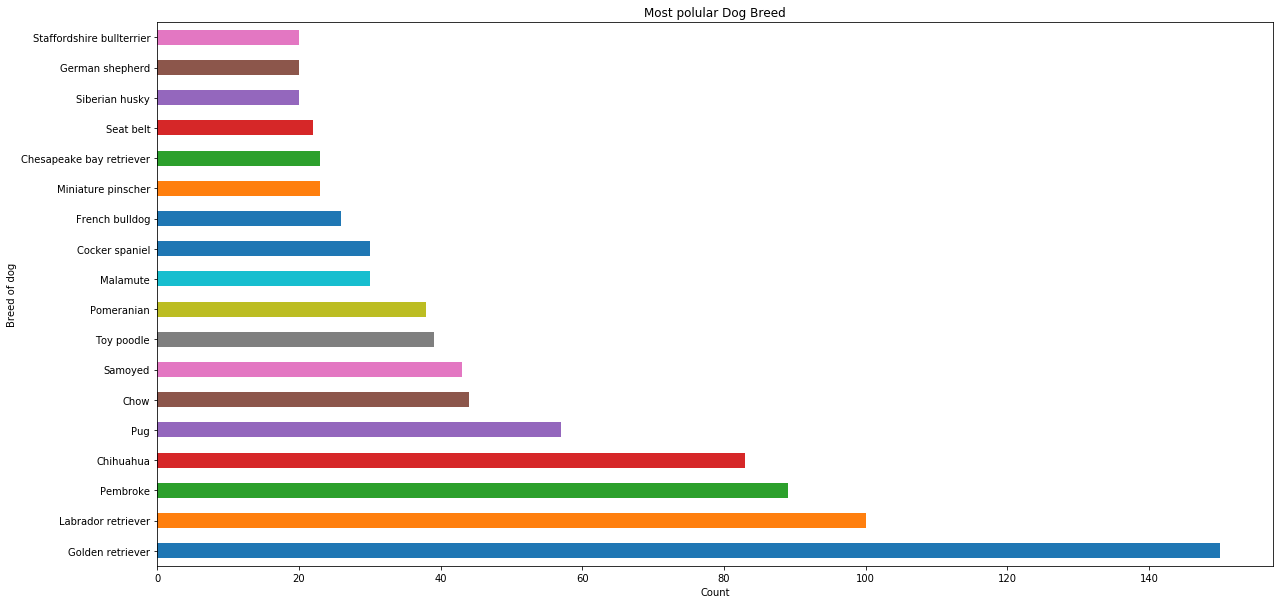

In [113]:
# Vizualise most popular dog breed (p1)

# only show those with more than/equal 20 ratings (use legth  for that)
dogs_for_diagram = dfjoined.groupby('p1').filter(lambda x: len(x) >= 20)

dogs_for_diagram['p1'].value_counts().plot(kind = 'barh',figsize=(20,10))
plt.title('Most polular Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

In [114]:
# Analyse favorite Dog names 

In [115]:
dfjoined['name'].value_counts()

Lucy            11
Charlie         11
Oliver          10
Cooper          10
Penny            9
Tucker           9
Lola             8
Winston          8
Sadie            8
Toby             7
Daisy            7
Bella            6
Bailey           6
Koda             6
Bo               6
Oscar            6
Stanley          6
Jax              6
Leo              5
Milo             5
Bentley          5
Chester          5
Rusty            5
Scout            5
Buddy            5
Dave             5
Louis            5
Dexter           4
Jack             4
Jerry            4
                ..
Howie            1
Genevieve        1
Godi             1
Edd              1
Jamesy           1
Tito             1
Alexanderson     1
Jeffri           1
Vinscent         1
Kanu             1
Sprinkles        1
Jim              1
Tilly            1
Maxwell          1
Loomis           1
Brutus           1
Lipton           1
Stuart           1
Sage             1
Damon            1
Jerome           1
Chesterson  

The favorite dog names are(none excludes):
1. Lucy           
2. Charlie         
3. Cooper          

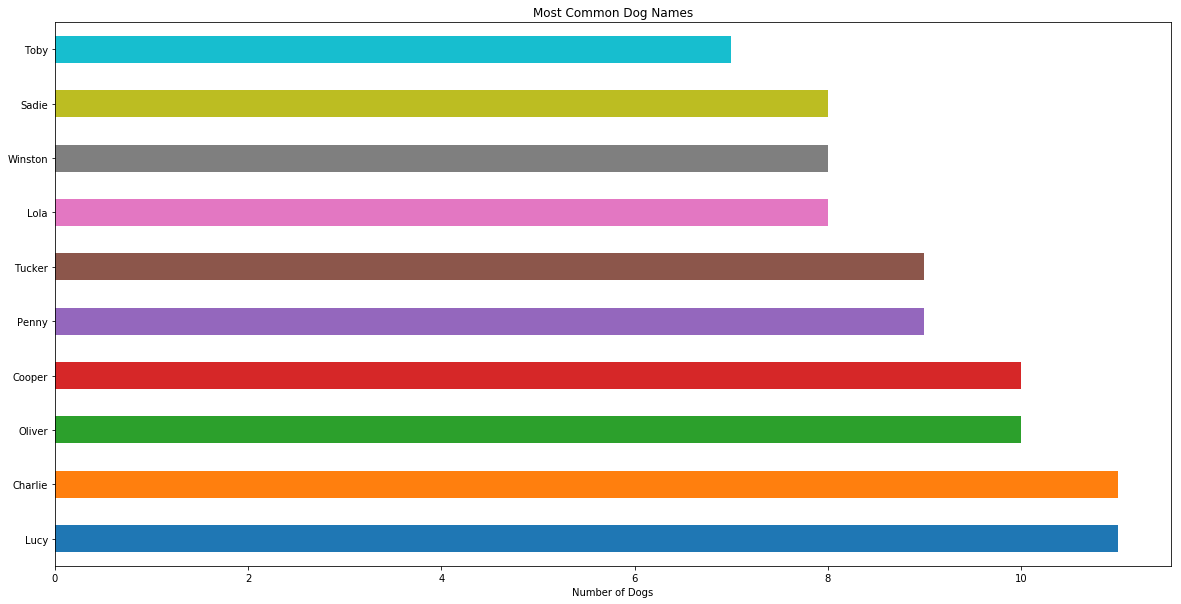

In [116]:
# Visulize the top 10 names 
dfjoined.name.value_counts()[0:10].plot('barh', figsize=(20,10), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [117]:
# Analyse number of Tweets per day of the week and the avaerage rating for that weekday

# create copy of master dataframe and add column to indecate weekday (using dt.day_name()from pandas docs)
df_week = dfjoined.copy()
df_week ["Week_Day"] = df_week['timestamp'].dt.day_name()

# get number of tweets per weekday
a = df_week.Week_Day.value_counts()
print('Number of tweets per day:')
print(a)

# get average rating (standardized) per weekday
b = df_week.groupby('Week_Day').standardized_rating.mean()
print('Avg rating per day:')
print(b)


Number of tweets per day:
Monday       356
Tuesday      325
Wednesday    322
Thursday     304
Friday       303
Saturday     281
Sunday       275
Name: Week_Day, dtype: int64
Avg rating per day:
Week_Day
Friday       1.078833
Monday       1.045586
Saturday     1.071530
Sunday       1.046909
Thursday     1.073794
Tuesday      1.068923
Wednesday    1.051299
Name: standardized_rating, dtype: float64


The number of tweets is the highest on Monday and reduces over the week. Friday, Sataurday and Thuseday tent to have the highest ratings in average. 

Text(0.5,1,'Distribution of tweet counts vs avg rating per weekday ')

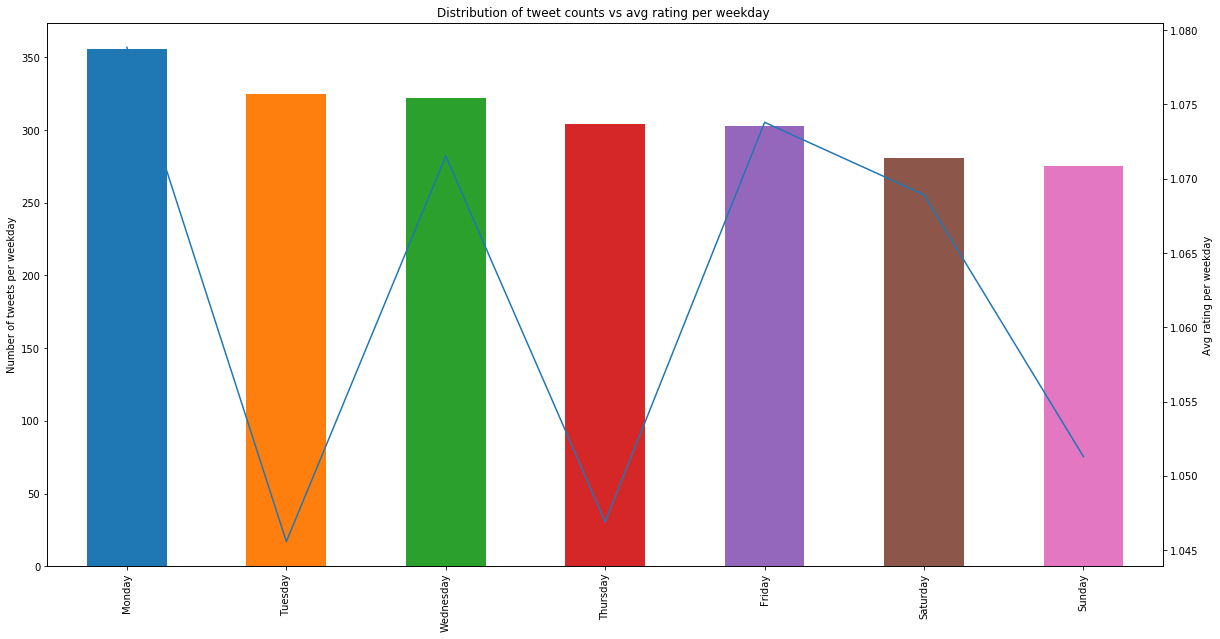

In [274]:
# Visulize the results in a bar/ line graph on two axes

# FROM STACK OVERFLOW  
#--------------
# https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
# first create matplorlip figure 
# then crate matplot axes
# and the twin it for the second axces 
fig = plt.figure() 
ax1 = fig.add_subplot(111) 
ax2 = ax1.twinx() 
#-----------------

# plot the tweet count as bar and avg rating as line graph
df_week.groupby('Week_Day').standardized_rating.mean().plot('line', figsize=(20,10), ax=ax2)
df_week.Week_Day.value_counts().plot('bar', figsize=(20,10), ax=ax1)

# name the two axies
ax1.set_ylabel('Number of tweets per weekday')
ax2.set_ylabel('Avg rating per weekday')

# title
plt.title('Distribution of tweet counts vs avg rating per weekday ')


<a id='Reporting'></a>
## Reporting

The report for this project can be found in the Jupiter Notebook folder:
1. wrangle_report.html
2. act_report.html